<a href="https://colab.research.google.com/github/mari-rufino-g/DiscursoLula2021/blob/main/Analise_DiscursoLula_10mar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Caminho para os arquivos utilizados

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Importando pacotes necessários

In [ ]:
import numpy as np
import pandas as pd
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import regex
import string
from collections import Counter

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#Importando o arquivo txt

In [ ]:
Lula = open('/content/drive/MyDrive/Colab Notebooks/DiscursoLula.txt', 'r')

In [ ]:
discurso = Lula.read()

In [ ]:
discurso

'Eu estava sentado no teu lugar e eu estava com um pouco de dificuldade de entender todas as palavras que você falava, possivelmente porque estava de máscara. Acho que o Soventino é médico.\n\nEu acho que o seguinte: primeiro, espero que todo mundo esteja de máscara aqui, que todo mundo esteja se cuidando, espero que brevemente todos vocês tenham tomando vacina. Eu queria falar com o médico aqui, se eu posso tirar minha máscara pra falar. Eu estou há dois metros de distância, vocês todos já fizeram o teste. Vocês todos estão livres. Então, eu gostaria de tirar minha máscara para poder falar com vocês.\nBem, faz quase três anos que eu saí da sede desse sindicato para me entregar à Polícia Federal. Eu fui, obviamente, contra a minha vontade, porque sabia que estavam prendendo um inocente. Muitos dos que estavam aqui não queriam que eu fosse me entregar.\n\nEu tomei a decisão de me entregar porque não seria correto, um homem na minha idade, um homem com a\xa0construção da história constru

Discurso do Lula contém 54.330 **palavras**

In [ ]:
len(discurso)

54330

Agora vamos dividir o nosso texto em token

In [ ]:
discurso_token = word_tokenize(discurso.lower())

Retirando as stopwords da nossa lista de palavras. . Retiramos também todas as pontuações utilizando ponctuation da biblioteca string.

In [ ]:
from string import punctuation
stopwords = nltk.corpus.stopwords.words('portuguese') + list(punctuation)

In [ ]:
discurso_stop = [w for w in discurso_token if not w in stopwords] 

In [ ]:
discurso_stop

['sentado',
 'lugar',
 'pouco',
 'dificuldade',
 'entender',
 'todas',
 'palavras',
 'falava',
 'possivelmente',
 'porque',
 'máscara',
 'acho',
 'soventino',
 'médico',
 'acho',
 'seguinte',
 'primeiro',
 'espero',
 'todo',
 'mundo',
 'máscara',
 'aqui',
 'todo',
 'mundo',
 'cuidando',
 'espero',
 'brevemente',
 'todos',
 'tomando',
 'vacina',
 'queria',
 'falar',
 'médico',
 'aqui',
 'posso',
 'tirar',
 'máscara',
 'pra',
 'falar',
 'dois',
 'metros',
 'distância',
 'todos',
 'fizeram',
 'teste',
 'todos',
 'livres',
 'então',
 'gostaria',
 'tirar',
 'máscara',
 'poder',
 'falar',
 'bem',
 'faz',
 'quase',
 'três',
 'anos',
 'saí',
 'sede',
 'desse',
 'sindicato',
 'entregar',
 'polícia',
 'federal',
 'obviamente',
 'contra',
 'vontade',
 'porque',
 'sabia',
 'prendendo',
 'inocente',
 'muitos',
 'aqui',
 'queriam',
 'entregar',
 'tomei',
 'decisão',
 'entregar',
 'porque',
 'correto',
 'homem',
 'idade',
 'homem',
 'construção',
 'história',
 'construída',
 'junto',
 'pudesse',
 'ap

Agora temos nossa lista de palavras do texto sem as stopwords, armazenada na variável discurso_stop

### Verificando frequencia das palavras

Hora de criar a nossa distribuição de frequência para essa lista de palavras e descobrir quais são as mais importantes. Para isso, vamos utilizar a função FreqDist da biblioteca nltk.probability

In [ ]:
from nltk.probability import FreqDist
frequencia = FreqDist(discurso_stop)
#Se eu imprimir a frequencia terei a lista com a frequencia de todas as palavras 

In [ ]:
fd = FreqDist(discurso_stop)
print("30 palavras mais frequentes:")
print(fd.most_common(30))

30 palavras mais frequentes:
[('porque', 86), ('país', 68), ('gente', 67), ('pra', 65), ('pessoas', 41), ('vai', 38), ('presidente', 36), ('quero', 36), ('ter', 33), ('aqui', 30), ('então', 30), ('agradecer', 30), ('mundo', 28), ('brasil', 25), ('ser', 25), ('anos', 21), ('povo', 21), ('sabe', 21), ('vou', 19), ('fazer', 19), ('todo', 18), ('vacina', 18), ('verdade', 18), ('companheiro', 17), ('coisa', 17), ('falar', 16), ('contra', 16), ('``', 16), ('imprensa', 16), ('dizer', 15)]


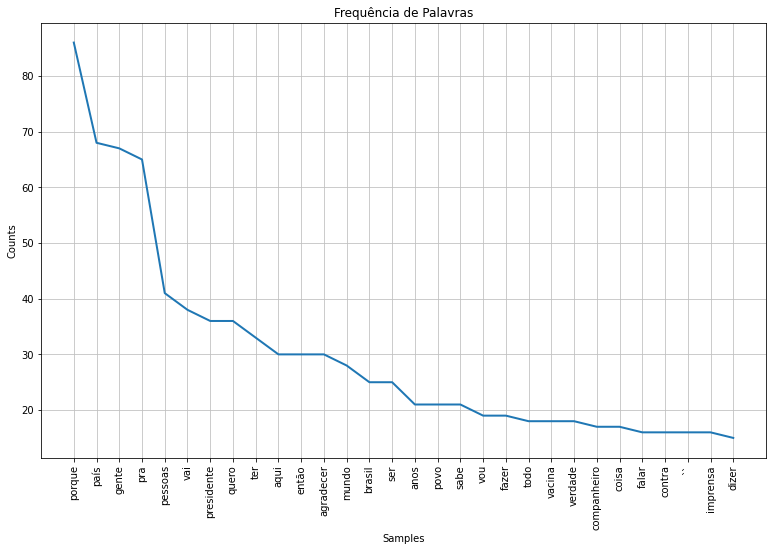

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (13, 8))
fd.plot(30, title = "Frequência de Palavras")

### Criando nuvem de palavras

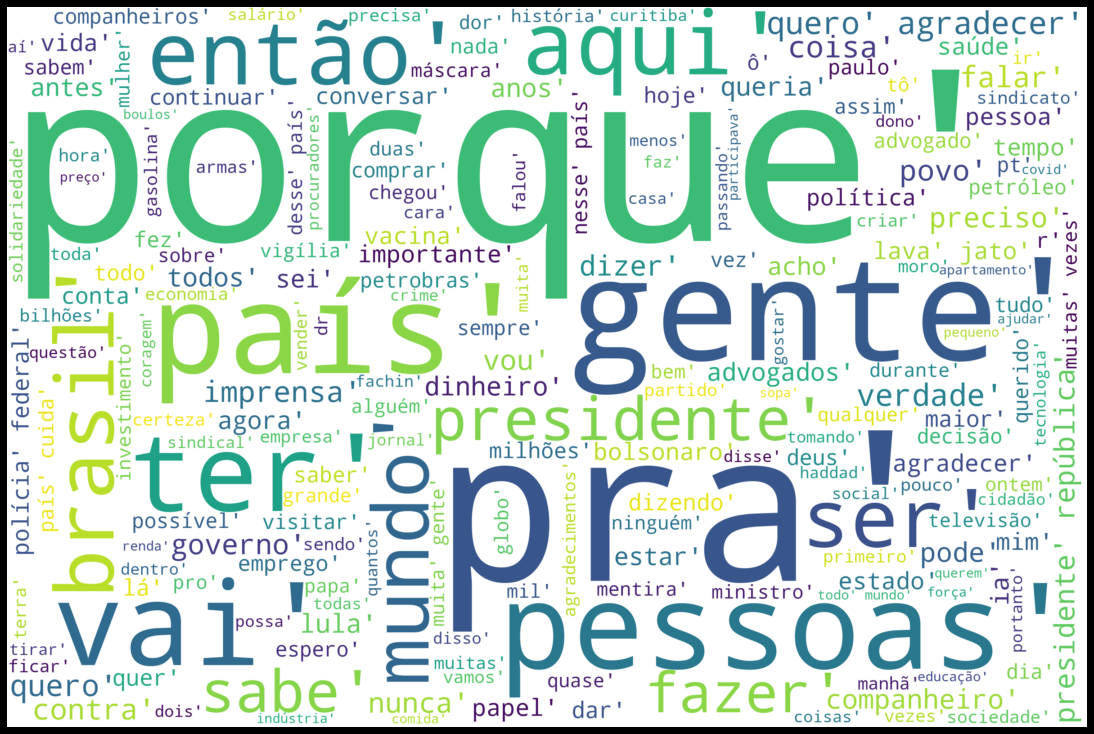

In [ ]:
text = discurso_stop
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'white',
    stopwords=stopwords).generate(str(text))
fig = plt.figure(
    figsize = (20, 10),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Counter é uma subclasse de dict, portanto podemos acessar seus elementos por meio de índices, do mesmo jeito que fazemos com dicionários. Isso é útil quando queremos saber qual a contagem específica de um determinado elemento

***Quantas vezes o Lula falou da vacina?***

In [ ]:
from collections import Counter
c = Counter(discurso_stop)
c['vacina']

18

***Quantas vezes o Lula falou de Deus***

In [ ]:
from collections import Counter
c = Counter(discurso_stop)
c['deus']

9